<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/QLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
    Q(s_{t},a_{t}) \leftarrow \underbrace{r_{t}}_{\rm reward} + \underbrace{\gamma}_{\rm discount} \cdot \underbrace{\max_{a}Q(s_{t+1}, a)}_{\rm estimate~of~future~rewards}
$$

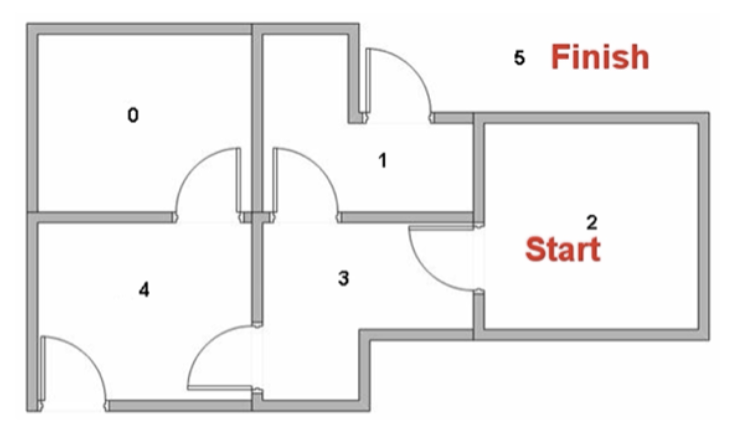

In [5]:
import numpy as np
# Define the states
ndim = 6
location_to_state = {
    'L0': 0,
    'L1': 1,
    'L2': 2,
    'L3': 3,
    'L4': 4,
    'L5': 5,
}
# Define the actions
actions = [0, 1, 2, 3, 4, 5, 6, 7, 8]
# Define the rewards
rewards = np.array([[0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 0, 100],
                    [0, 0, 0, 1, 0, 0],
                    [0, 1, 1, 0, 1, 0],
                    [1, 0, 0, 1, 0, 100],
                    [0, 1, 0, 0, 1, 100]])

# Maps indices to locations
state_to_location = dict((state, location)
                         for location, state in location_to_state.items())

# Initialize parameters
gamma = 1/2  # Discount factor
alpha = 1.0  # Learning rate


def get_optimal_route(start_location, end_location):
    # Copy the rewards matrix to new Matrix
    rewards_new = np.copy(rewards)

    # Get the ending state corresponding to the ending location as given
    ending_state = location_to_state[end_location]

    # With the above information automatically set the priority of the given ending
    # state to the highest one
    rewards_new[ending_state, ending_state] = 100

    # -----------Q-Learning algorithm-----------

    # Initializing Q-Values
    Q = np.array(np.zeros([ndim, ndim]))
    print(Q)
    np.random.seed(1)
    # Q-Learning process
    for i in range(1000):
        # Pick up a state randomly
        # Python excludes the upper bound
        current_state = np.random.randint(0, ndim)
        # For traversing through the neighbor locations in the maze
        playable_actions = []
        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(ndim):
            if rewards_new[current_state, j] > 0:
                playable_actions.append(j)
        # Pick an action randomly from the list of playable actions
        # leading us to the next state
        next_state = np.random.choice(playable_actions)

        # Compute the temporal difference
        # The action here exactly refers to going to the next state
        TD = rewards_new[current_state, next_state] + gamma * Q[next_state,  
                  np.argmax(Q[next_state, ])] - Q[current_state, next_state]
        # Update the Q-Value using the Bellman equation
        Q[current_state, next_state] += alpha * TD
        #print(f'current: {current_state}, next: {next_state}')
        # print(Q)

 # Initialize the optimal route with the starting location
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of
    # starting location
    next_location = start_location

    # We don't know about the exact number of iterations
    # needed to reach to the final location hence while loop will be a good choice
    # for iteratiing

    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state, ])
        # We got the index of the next state. But we need the corresponding letter.
        next_location = state_to_location[next_state]
        route.append(next_location)
        # Update the starting location for the next iteration
        start_location = next_location
    print(f'{Q}')
    return route


np.set_printoptions(precision=0)
print(get_optimal_route('L2', 'L5'))


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[  0.   0.   0.   0. 101.   0.]
 [  0.   0.   0.  52.   0. 200.]
 [  0.   0.   0.  52.   0.   0.]
 [  0. 101.  27.   0. 101.   0.]
 [ 52.   0.   0.  52.   0. 200.]
 [  0. 101.   0.   0. 101. 200.]]
['L2', 'L3', 'L1', 'L5']


In [ ]:
# Code from https://blog.floydhub.com/an-introduction-to-q-learning-reinforcement-learning/ 
import numpy as np
# Define the states
location_to_state = {
    'L1' : 0,
    'L2' : 1,
    'L3' : 2,
    'L4' : 3,
    'L5' : 4,
    'L6' : 5,
    'L7' : 6,
    'L8' : 7,
    'L9' : 8
}

# Room Layout 


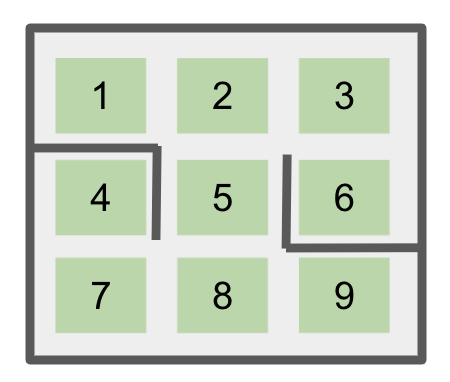

### Rewards Matrix
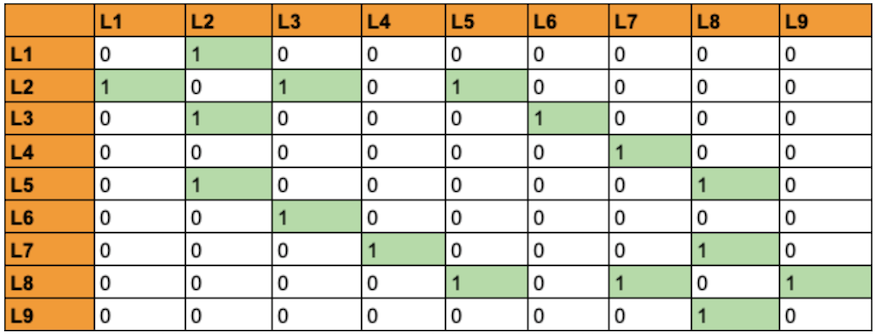

In [ ]:
# Define the actions
actions = [0,1,2,3,4,5,6,7,8]

In [ ]:
# Define the rewards
rewards = np.array([[0,1,0,0,0,0,0,0,0],
              [1,0,1,0,1,0,0,0,0],
              [0,1,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0,0],
              [0,1,0,0,0,0,0,1,0],
              [0,0,1,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,1,0],
              [0,0,0,0,1,0,1,0,1],
              [0,0,0,0,0,0,0,1,0]])

In [ ]:
# Maps indices to locations
state_to_location = dict((state,location) for location,state in location_to_state.items())

In [ ]:
# Initialize parameters
gamma = 0.75 # Discount factor 
alpha = 0.9 # Learning rate 

In [ ]:
def get_optimal_route(start_location,end_location):
    # Copy the rewards matrix to new Matrix
    rewards_new = np.copy(rewards)
    
    # Get the ending state corresponding to the ending location as given
    ending_state = location_to_state[end_location]
    
    # With the above information automatically set the priority of the given ending 
    # state to the highest one
    rewards_new[ending_state,ending_state] = 999

    # -----------Q-Learning algorithm-----------
   
    # Initializing Q-Values
    Q = np.array(np.zeros([9,9]))

    # Q-Learning process
    for i in range(1000):
        # Pick up a state randomly
        current_state = np.random.randint(0,9) # Python excludes the upper bound
        # For traversing through the neighbor locations in the maze
        playable_actions = []
        # Iterate through the new rewards matrix and get the actions > 0
        for j in range(9):
            if rewards_new[current_state,j] > 0:
                playable_actions.append(j)
        # Pick an action randomly from the list of playable actions  
        # leading us to the next state
        next_state = np.random.choice(playable_actions)
        # Compute the temporal difference
        # The action here exactly refers to going to the next state
        TD = rewards_new[current_state,next_state] + gamma * Q[next_state,np.argmax(Q[next_state,])] - Q[current_state,next_state]
        # Update the Q-Value using the Bellman equation
        Q[current_state,next_state] += alpha * TD

 # Initialize the optimal route with the starting location
    route = [start_location]
    # We do not know about the next location yet, so initialize with the value of 
    # starting location
    next_location = start_location
    
    # We don't know about the exact number of iterations
    # needed to reach to the final location hence while loop will be a good choice 
    # for iteratiing
    
    while(next_location != end_location):
        # Fetch the starting state
        starting_state = location_to_state[start_location]
        
        # Fetch the highest Q-value pertaining to starting state
        next_state = np.argmax(Q[starting_state,])
        
        # We got the index of the next state. But we need the corresponding letter. 
        next_location = state_to_location[next_state]
        route.append(next_location)
        
        # Update the starting location for the next iteration
        start_location = next_location
    print(Q)
    return route

In [ ]:
np.set_printoptions(precision=0)
print(get_optimal_route('L9', 'L1'))


[[3996. 2249.    0.    0.    0.    0.    0.    0.    0.]
 [2998.    0. 1688.    0. 1688.    0.    0.    0.    0.]
 [   0. 2249.    0.    0.    0. 1267.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  951.    0.    0.]
 [   0. 2249.    0.    0.    0.    0.    0. 1267.    0.]
 [   0.    0. 1688.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  714.    0.    0.    0. 1267.    0.]
 [   0.    0.    0.    0. 1688.    0.  951.    0.  951.]
 [   0.    0.    0.    0.    0.    0.    0. 1267.    0.]]
['L9', 'L8', 'L5', 'L2', 'L1']
